# Mount Drive

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import các thư viện

In [ ]:
!pip install pyvi
!pip install underthesea
!mkdir -p /content/drive/MyDrive/NLP/Models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 19.6 MB/s eta 0:00:00


In [45]:
# !pip install google-auth --upgrade # Make sure you have the latest version
import pandas as pd
from pyvi import ViTokenizer
from underthesea import sent_tokenize
import re
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score, f1_score, precision_score, classification_report
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import pickle

# Đọc bộ dữ liệu

In [47]:
df = pd.read_csv('/content/gdrive/MyDrive/NLP/Data/processed_data.csv')
df.shape

(984, 6)

### Loại bỏ các giá trị null

In [48]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,Comment,Label,1_Comment,2_Comment,tokens,sent_tokens
0,"Trường rất xịn xò, view cũng quá okela, thầy c...",1,trường rất xịn xò view cũng quá okela thầy cô ...,trường rất xịn xò view cũng quá okela thầy cô ...,"['trường', 'rất', 'xịn_xò', 'view', 'cũng', 'q...",trường rất xịn_xò view cũng quá okela thầy_cô ...
1,"Thầy cô vui tính, dễ thương lắm nha, ngoài ra ...",1,thầy cô vui tính dễ thương lắm nha ngoài ra cò...,thầy cô vui tính dễ thương lắm nha ngoài ra cò...,"['thầy_cô', 'vui_tính', 'dễ_thương', 'lắm', 'n...",thầy_cô vui_tính dễ_thương lắm nha ngoài_ra cò...
2,"Trường có không gian xanh, mát mẻ. Thầy cô dễ ...",1,trường có không gian xanh mát mẻ thầy cô dễ th...,trường có không gian xanh mát mẻ thầy cô dễ th...,"['trường', 'có', 'không_gian', 'xanh', 'mát_mẻ...",trường có không_gian xanh mát_mẻ thầy_cô dễ_th...
3,Điểm mạnh nhất của TDMU là đội ngũ giảng viên ...,1,điểm mạnh nhất của tdmu là đội ngũ giảng viên ...,điểm mạnh nhất của tdmu là đội ngũ giảng viên ...,"['điểm', 'mạnh', 'nhất', 'của', 'tdmu', 'là', ...",điểm mạnh nhất của tdmu là đội_ngũ giảng_viên ...
4,"Thầy cô nhiệt tình, chất lượng đào tạo tốt, si...",1,thầy cô nhiệt tình chất lượng đào tạo tốt sinh...,thầy cô nhiệt tình chất lượng đào tạo tốt sinh...,"['thầy_cô', 'nhiệt_tình', 'chất_lượng', 'đào_t...",thầy_cô nhiệt_tình chất_lượng đào_tạo tốt sinh...
...,...,...,...,...,...,...
979,Học từ lúc đại học thầy cô cũ còn tâm huyết. Q...,0,học từ lúc đại học thầy cô cũ còn tâm huyết qu...,học từ lúc đại học thầy cô cũ còn tâm huyết qu...,"['học', 'từ', 'lúc', 'đại_học', 'thầy_cô', 'cũ...",học từ lúc đại_học thầy_cô cũ còn tâm_huyết qu...
980,"Trường h chỉ còn cái tiếng, là trung tâm kiếm ...",0,trường h chỉ còn cái tiếng là trung tâm kiếm t...,trường h chỉ còn cái tiếng là trung tâm kiếm t...,"['trường', 'h', 'chỉ_còn', 'cái', 'tiếng', 'là...",trường h chỉ_còn cái tiếng là trung_tâm kiếm t...
981,"Tốt. Thầy cô tốt, tâm huyết. Đào tạo và điều t...",1,tốt thầy cô tốt tâm huyết đào tạo và điều trị ...,tốt thầy cô tốt tâm huyết đào tạo và điều trị ...,"['tốt', 'thầy_cô', 'tốt', 'tâm_huyết', 'đào_tạ...",tốt thầy_cô tốt tâm_huyết đào_tạo và điều_trị ...
982,"Trường khang trang, rộng rãi, nhiều bộ môn hơn...",1,trường khang trang rộng rãi nhiều bộ môn hơn x...,trường khang trang rộng rãi nhiều bộ môn hơn x...,"['trường', 'khang_trang', 'rộng_rãi', 'nhiều',...",trường khang_trang rộng_rãi nhiều bộ_môn hơn x...


# Train - Test Split

In [49]:
X = df['sent_tokens']   #X = df['2_Comment']
y = df['Label']

# Tách thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Train Model

In [50]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_train)
y = pd.to_numeric(y_train, errors='coerce').astype(int)

y = y.reset_index(drop=True)

# K-Fold cross-validation on the training set
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results_nb = []
results_knn = []
results_rf = []

for train_index, test_index in kf.split(X): # Split the training set
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] # Use iloc to access by position

    # Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train_fold, y_train_fold) # Fit with fold data
    nb_pred = nb_model.predict(X_test_fold) # Predict on validation fold

    # KNN
    knn_model = KNeighborsClassifier(metric = 'cosine', n_neighbors = 5)
    knn_model.fit(X_train_fold, y_train_fold) # Fit with fold data
    knn_pred = knn_model.predict(X_test_fold) # Predict on validation fold

    #Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_features="log2")
    rf_model.fit(X_train_fold, y_train_fold) # Fit with fold data
    rf_pred = rf_model.predict(X_test_fold) # Predict on validation fold

    # Append results to lists
    results_nb.append({
        'f1': f1_score(y_test_fold, nb_pred, pos_label = 0),
        'recall': recall_score(y_test_fold, nb_pred, pos_label = 0),
        'precision': precision_score(y_test_fold, nb_pred, pos_label = 0)
    })

    results_knn.append({
        'f1': f1_score(y_test_fold, knn_pred, pos_label = 0),
        'recall': recall_score(y_test_fold, knn_pred, pos_label = 0),
        'precision': precision_score(y_test_fold, knn_pred, pos_label = 0)
    })

    results_rf.append({
        'f1': f1_score(y_test_fold, rf_pred, pos_label = 0),
        'recall': recall_score(y_test_fold, rf_pred, pos_label = 0),
        'precision': precision_score(y_test_fold, rf_pred, pos_label = 0)
    })

avg_f1_nb = np.mean([result['f1'] for result in results_nb])
print(f"Average Naive Bayes F1: {np.mean([result['f1'] for result in results_nb]):.2f}")
print(f"Average Naive Bayes Recall: {np.mean([result['recall'] for result in results_nb]):.2f}")
print(f"Average Naive Bayes Precision: {np.mean([result['precision'] for result in results_nb]):.2f}")
print('---------------')
print(f"Average KNN F1: {np.mean([result['f1'] for result in results_knn]):.2f}")
print(f"Average KNN Recall: {np.mean([result['recall'] for result in results_knn]):.2f}")
print(f"Average KNN Precision: {np.mean([result['precision'] for result in results_knn]):.2f}")
print('---------------')
print(f"Average RF F1: {np.mean([result['f1'] for result in results_rf]):.2f}")
print(f"Average RF Recall: {np.mean([result['recall'] for result in results_rf]):.2f}")
print(f"Average RF Precision: {np.mean([result['precision'] for result in results_rf]):.2f}")
print('---------------')

Average Naive Bayes F1: 0.75
Average Naive Bayes Recall: 0.65
Average Naive Bayes Precision: 0.89
---------------
Average KNN F1: 0.77
Average KNN Recall: 0.74
Average KNN Precision: 0.81
---------------
Average RF F1: 0.77
Average RF Recall: 0.71
Average RF Precision: 0.85
---------------


# Dự đoán trên tập test

In [51]:
# Vectorize test data
X_test_vectorized = vectorizer.transform(X_test)

# Dự báo
nb_predictions = nb_model.predict(X_test_vectorized)
knn_predictions = knn_model.predict(X_test_vectorized)
rf_predictions = rf_model.predict(X_test_vectorized)

nb_recall = recall_score(y_test, nb_predictions, pos_label = 0)
knn_recall = recall_score(y_test, knn_predictions, pos_label = 0)
rf_recall = recall_score(y_test, rf_predictions, pos_label = 0)

nb_precision = precision_score(y_test, nb_predictions, pos_label = 0)
knn_precision = precision_score(y_test, knn_predictions, pos_label = 0)
rf_precision = precision_score(y_test, rf_predictions, pos_label = 0)

nb_f1 = f1_score(y_test, nb_predictions, pos_label = 0)
knn_f1 = f1_score(y_test, knn_predictions, pos_label = 0)
rf_f1 = f1_score(y_test, rf_predictions, pos_label = 0)

print(f"Naive Bayes Recall: {nb_recall:.2f}")
print(f"KNN Recall: {knn_recall:.2f}")
print(f"Random Forest Recall: {rf_recall:.2f}")
print('---------------')
print(f"Naive Bayes Precision: {nb_precision:.2f}")
print(f"KNN Precision: {knn_precision:.2f}")
print(f"Random Forest Precision: {rf_precision:.2f}")
print('---------------')
print(f"Naive Bayes F1: {nb_f1:.2f}")
print(f"KNN F1: {knn_f1:.2f}")
print(f"Random Forest F1: {rf_f1:.2f}")


Naive Bayes Recall: 0.61
KNN Recall: 0.78
Random Forest Recall: 0.70
---------------
Naive Bayes Precision: 0.93
KNN Precision: 0.95
Random Forest Precision: 0.94
---------------
Naive Bayes F1: 0.74
KNN F1: 0.86
Random Forest F1: 0.80


### So sánh kết quả dự đoán của 3 thuật toán với nhãn đúng của quan sát

In [52]:
# Convert y_test to a numerical format that accuracy_score can understand
y_test = pd.to_numeric(y_test, errors='coerce').astype(int)
# Resetting index can also resolve the issue if y_test has non-positional index
y_test = y_test.reset_index(drop=True)

# Create the DataFrame
results_df = pd.DataFrame({
    'Comment': X_test.reset_index(drop=True),
    'NB_Prediction': nb_predictions,
    'KNN_Prediction': knn_predictions,
    'RF_Prediction': rf_predictions,
    'True_Label': y_test
})

results_df

,Comment,NB_Prediction,KNN_Prediction,RF_Prediction,True_Label
0,trường vị_trí khá đẹp trường cũng đẹp cơ_sở vậ...,1,1,1,1
1,khuôn_viên rộng đẹp đang sửa_chữa mới,1,1,1,1
2,nhiều thầy dễ_thương dạy toán tiếng anh xong l...,0,1,0,0
3,chất_lượng đầu_ra không đảm_bảo,1,0,0,0
4,mấy cuộc thi sao ngày_càng ít đi vậy trường ơi...,1,0,0,0
5,trường không có hoạt_động gì nổi_bật,0,0,0,0
6,trường này cute lắm ỏ,1,1,1,1
7,học ở đây mà như ngồi_tù không có hoạt_động gì...,0,0,0,0
8,máy_lạnh everywhere và đặc_biệt chất_lượng giả...,1,1,1,1
9,tuyệt_vời,1,1,1,1


### Ma trận nhầm lẫn của ba thuật toán trên tập test

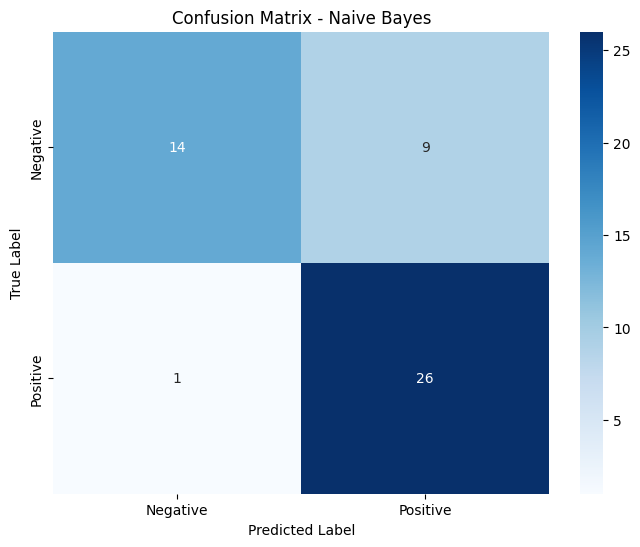

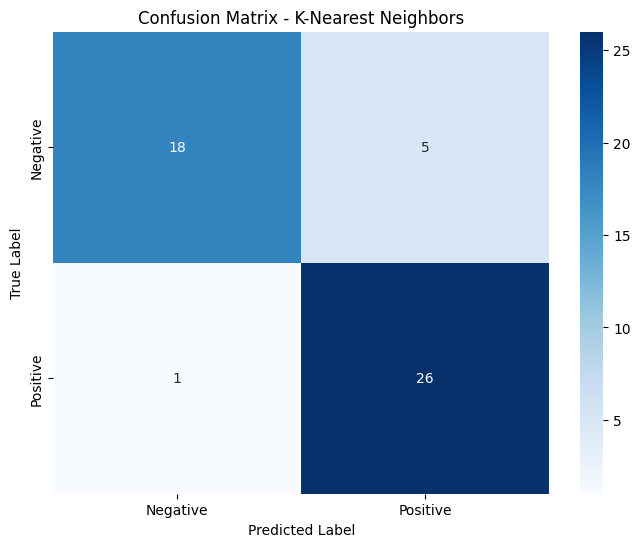

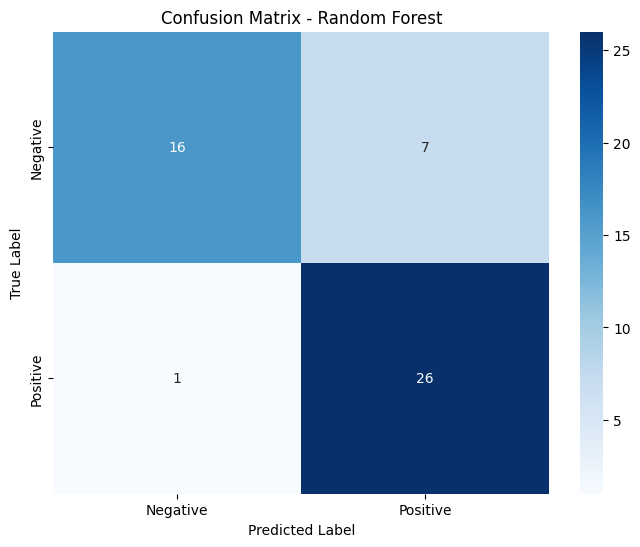

In [53]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, nb_predictions, 'Naive Bayes')
plot_confusion_matrix(y_test, knn_predictions, 'K-Nearest Neighbors')
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest')

# Điều chỉnh siêu tham số

### Không gian tìm kiếm

In [ ]:
# Define the parameter grid for each model
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}

param_grid_knn = {
    'n_neighbors': [8, 10, 12, 14],  # Số lượng hàng xóm
    'metric': ['cosine', 'manhattan', 'euclidean']
}

param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

custom_f1_scorer = make_scorer(f1_score, pos_label=0)

## Tìm kiếm tham số tối ưu cho thuật toán Naive Bayes và đánh giá trên tập test

Best parameters for Naive Bayes: {'alpha': 0.5}
Best F1 score for Naive Bayes: 0.7899884402632139
NB_Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.83      0.89      0.86        27

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



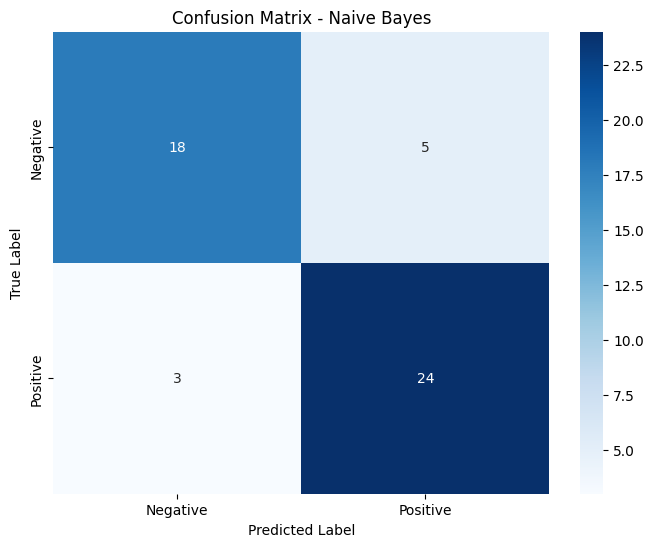

In [ ]:
grid_search_nb_f1 = GridSearchCV(nb_model, param_grid_nb, cv=kf, scoring=custom_f1_scorer)
grid_search_nb_f1.fit(X, y)
print("Best parameters for Naive Bayes:", grid_search_nb_f1.best_params_)
print("Best F1 score for Naive Bayes:", grid_search_nb_f1.best_score_)

best_nb_model = grid_search_nb_f1.best_estimator_
y_pred_nb = best_nb_model.predict(X_test_vectorized)
print("NB_Classification Report:\n", classification_report(y_test, y_pred_nb))
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')

## Tìm kiếm tham số tối ưu cho thuật toán KNN và đánh giá trên tập test

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 10}
Best F1 score for KNN: 0.7965153576622174
KNN_Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.86      0.93      0.89        27

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



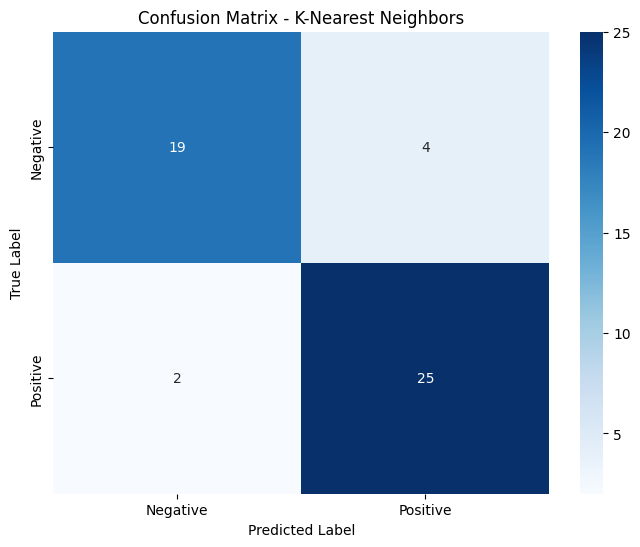

In [ ]:
grid_search_knn_f1 = GridSearchCV(knn_model, param_grid_knn, cv=kf, scoring=custom_f1_scorer)
grid_search_knn_f1.fit(X, y)
print("Best parameters for KNN:", grid_search_knn_f1.best_params_)
print("Best F1 score for KNN:", grid_search_knn_f1.best_score_)

best_knn_model = grid_search_knn_f1.best_estimator_
y_pred_knn = best_knn_model.predict(X_test_vectorized)
print("KNN_Classification Report:\n", classification_report(y_test, y_pred_knn))
plot_confusion_matrix(y_test, y_pred_knn, 'K-Nearest Neighbors')

## Tìm kiếm tham số tối ưu cho thuật toán Random Forest và đánh giá trên tập test

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best F1 score for Random Forest: 0.7829967562398352
RF_Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.87      0.96      0.91        27

    accuracy                           0.90        50
   macro avg       0.91      0.89      0.90        50
weighted avg       0.91      0.90      0.90        50



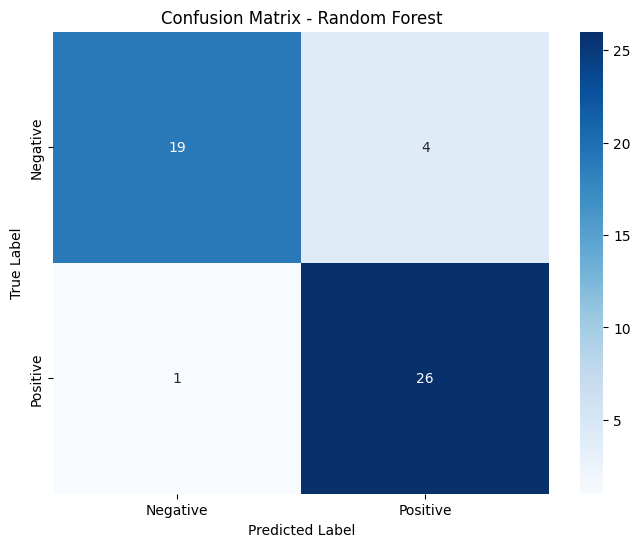

In [ ]:
grid_search_rf_f1 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=kf, scoring=custom_f1_scorer)
grid_search_rf_f1.fit(X, y)
print("Best parameters for Random Forest:", grid_search_rf_f1.best_params_)
print("Best F1 score for Random Forest:", grid_search_rf_f1.best_score_)

best_rf_model = grid_search_rf_f1.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_vectorized)
print("RF_Classification Report:\n", classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')